# Visualisation of the simple implementation of the damage functions in WILIAM

In this section, we'll go through some of the results of the implementation of the various damage function in the WILIAM model.

In [2]:
import pysd
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

## Preparing the data

### Loading the results

In [4]:
ds = xr.open_dataset('../../../results/batch/run_ds_18_07.nc')

variables = ['dice_5_eq_damage_function', 'witness_tipping_point_damage_eq_tipping_point_damge', 'witness_dicelike_damage_eq_dicelike_damage', 'dsk_a128_eq_shock_from_climate_change']

df = ds[variables + ['temperature_change', 'total_radiative_forcing']].to_dataframe().reset_index()

# Represent the variable as a percentage
df[variables] = df[variables] * 100

## General variables 

Here, we show some general variables to show how the model works. 

In [11]:
df['total_radiative_forcing'].plot(kind='kde')

KeyError: 'total_radiative_forcing'

In [ ]:
sns.scatterplot(data=df, x='total_radiative_forcing', y='temperature_change', hue='Run', s=5)

## Non-FUND models

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


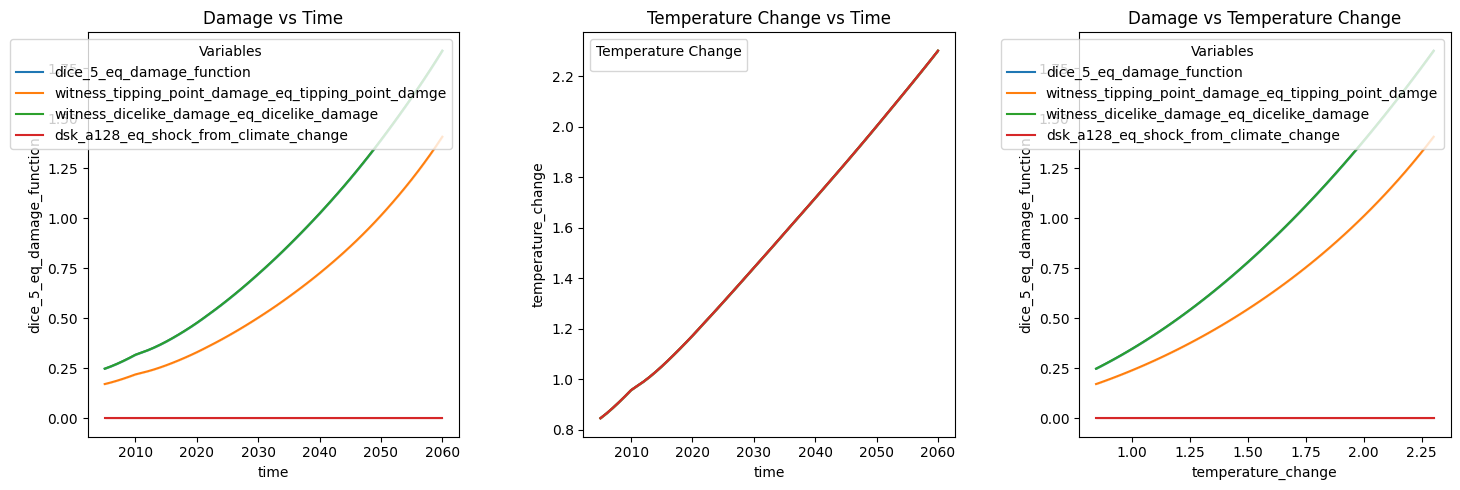

In [5]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))

hue = None

for i, variable in enumerate(variables): 

    sns.lineplot(data=df, x='time', y=variable, ax=ax[0], hue=hue,  label=variable)
    sns.lineplot(data=df, x='time', y='temperature_change', ax=ax[1])
    sns.lineplot(data=df, x='temperature_change', y=variable, ax=ax[2], hue=hue, label=variable)

# Définissez les légendes
ax[0].legend(title='Variables')
ax[1].legend(title='Temperature Change')
ax[2].legend(title='Variables')

# Ajoutez des titres aux sous-graphes
ax[0].set_title('Damage vs Time')
ax[1].set_title('Temperature Change vs Time')
ax[2].set_title('Damage vs Temperature Change')

# Ajustez la disposition pour éviter les chevauchements
plt.tight_layout()
plt.show()

## FUND Model 

### Preparing the variables

In [9]:
all_variables = pd.read_csv('../../../variables.csv')
fund_equations = all_variables[(all_variables['Real Name'].str.contains('FUND')) & (all_variables['Real Name'].str.contains('EQ'))]
fund_equations['Equation category'] = fund_equations['Equation'].str.split('.').str[0].str.strip()
variables = list(fund_equations["Py Name"].values)

#df = ds[variables + ['temperature_change']].to_dataframe().reset_index()

categories = fund_equations['Equation category'].unique()

C:\Users\gabriel.genelot\AppData\Local\Temp\ipykernel_10756\1198201578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fund_equations['Equation category'] = fund_equations['Equation'].str.split('.').str[0].str.strip()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

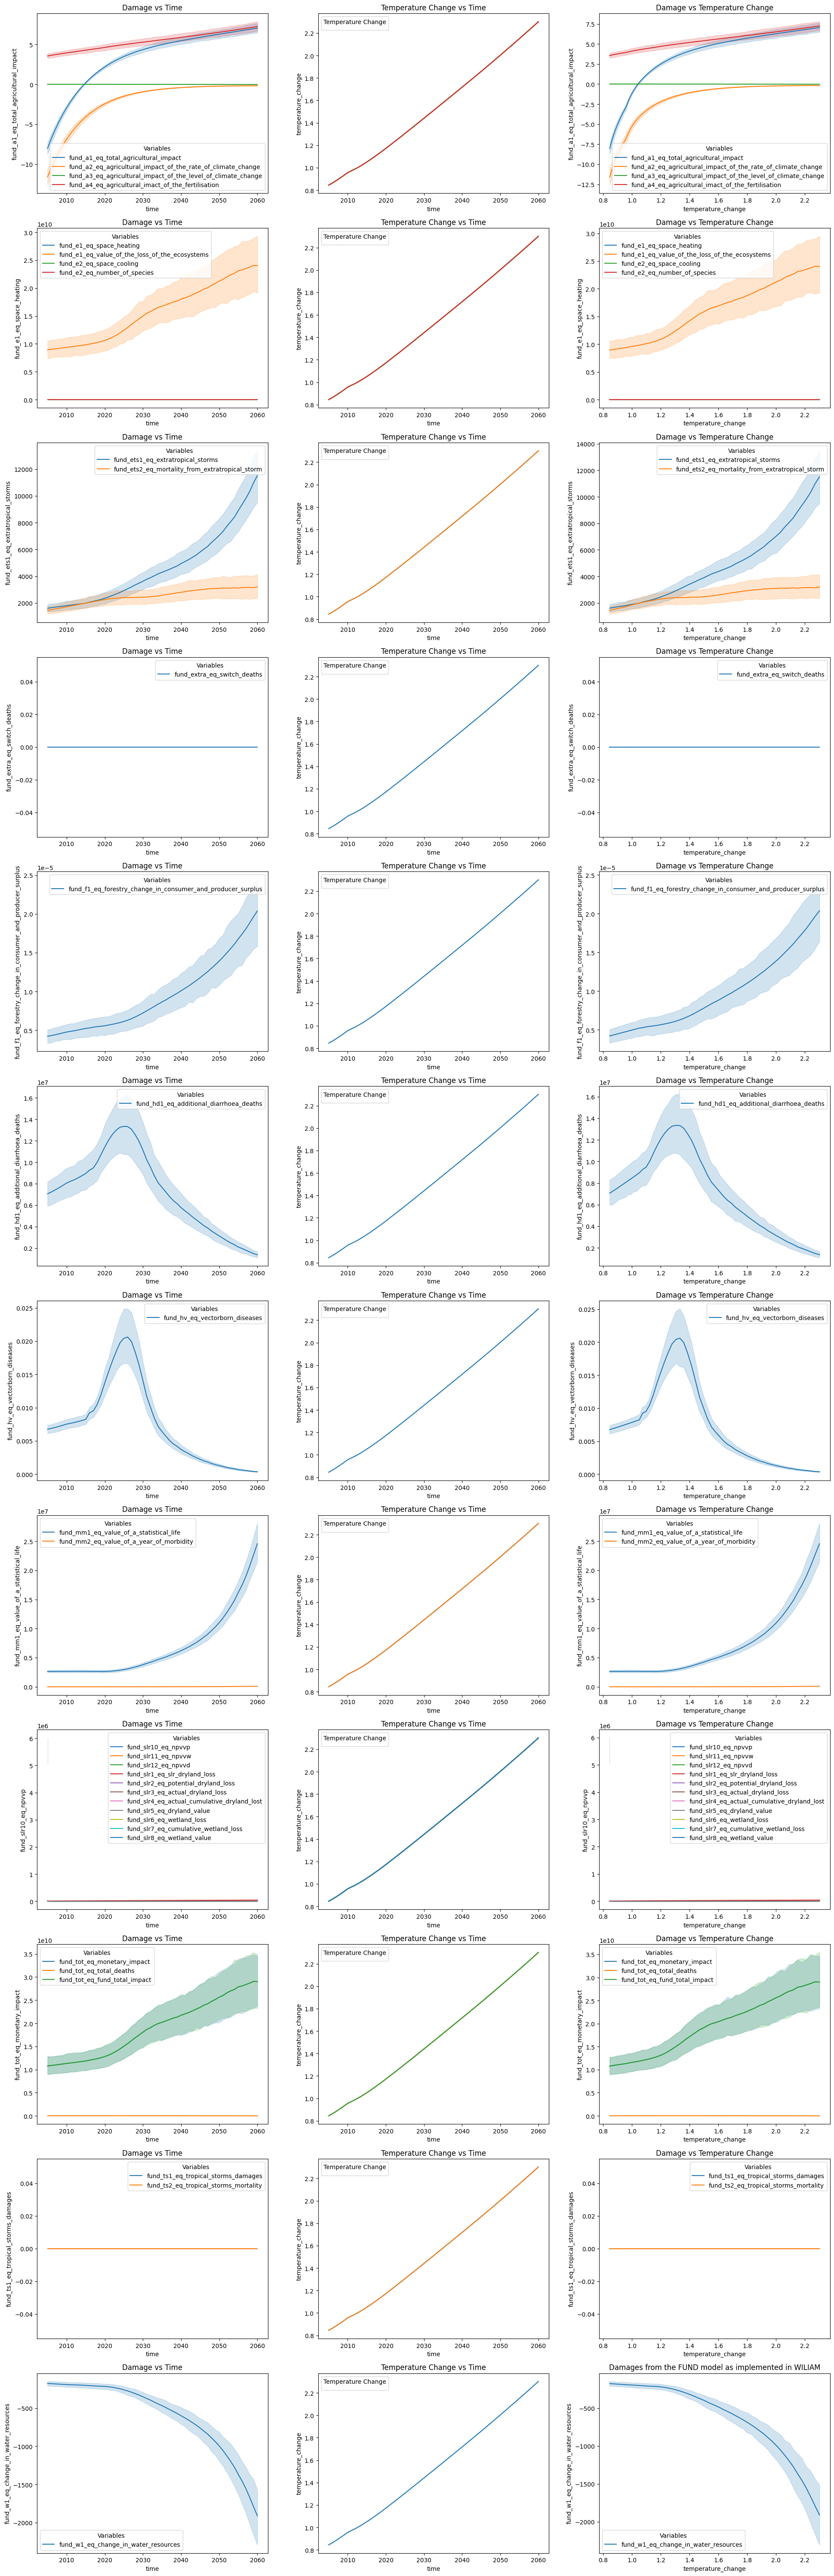

In [10]:
fig, ax = plt.subplots(len(categories),3, figsize=(20, 5*len(categories)))

hue = None

for j, category in enumerate(categories):

    variables = list(fund_equations[fund_equations['Equation category'] == category]["Py Name"].values)

    df = ds[variables + ['temperature_change']].to_dataframe().reset_index()

    for i, variable in enumerate(variables): 

        sns.lineplot(data=df, x='time', y=variable, ax=ax[j, 0], hue=hue,  label=variable)
        sns.lineplot(data=df, x='time', y='temperature_change', ax=ax[j, 1])
        sns.lineplot(data=df, x='temperature_change', y=variable, ax=ax[j, 2], hue=hue, label=variable)

    # Définissez les légendes
    ax[j,0].legend(title='Variables')
    ax[j,1].legend(title='Temperature Change')
    ax[j,2].legend(title='Variables')

    # Ajoutez des titres aux sous-graphes
    ax[j, 0].set_title('Damage vs Time')
    ax[j,1].set_title('Temperature Change vs Time')
    ax[j,2].set_title('Damage vs Temperature Change')

# Ajustez la disposition pour éviter les chevauchements
plt.title('Damages from the FUND model as implemented in WILIAM')
plt.tight_layout()
plt.show()
